In [5]:
import pandas as pd
import numpy as np

In [10]:
combined_data = pd.read_csv('rental_cleaned_data.csv')

In [11]:
combined_data

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Report Year
0,1-00576-7501,60 WEST 13 STREET,GREENWICH VILLAGE-CENTRAL,R4 -ELEVATOR,70.0,1966.0,82017.0,4452703.0,54.29,1729739.0,21.09,2722964.0,22115002.0,269.64,2019
1,1-01271-7501,1360 6 AVENUE,MIDTOWN WEST,R4 -ELEVATOR,183.0,1963.0,141738.0,7113830.0,50.19,2361355.0,16.66,4752475.0,38596999.0,272.31,2019
2,1-00894-7501,77 PARK AVENUE,MURRAY HILL,R4 -ELEVATOR,109.0,1924.0,158571.0,7329152.0,46.22,2854278.0,18.00,4474874.0,36343010.0,229.19,2019
3,1-00631-7501,712 GREENWICH STREET,GREENWICH VILLAGE-WEST,R9 -CONDOPS,20.0,1910.0,53943.0,2132906.0,39.54,666196.0,12.35,1466710.0,11912000.0,220.83,2019
4,1-00868-7501,35 EAST 38 STREET,MURRAY HILL,R4 -ELEVATOR,113.0,1961.0,88230.0,4288860.0,48.61,1055231.0,11.96,3233629.0,26261996.0,297.65,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79200,5-03983-0065,26 EBBITTS AVENUE,NEW DORP,D3 -ELEVATOR,254.0,1969.0,246848.0,4314903.0,17.48,2130298.0,8.63,2184605.0,16344000.0,66.21,2023
79201,5-02922-0150,225 PARK HILL AVENUE,CONCORD-FOX HILLS,D1 -ELEVATOR,305.0,1970.0,297600.0,6743616.0,22.66,3217056.0,10.81,3526560.0,26655000.0,89.57,2023
79202,5-03023-0028,30 NARROWS ROAD SOUTH,ROSEBANK,C7 -WALK-UP,14.0,1974.0,8950.0,210862.0,23.56,74106.0,8.28,136756.0,1110000.0,124.02,2023
79203,5-03343-0019,194 SEAVIEW AVENUE,GRANT CITY,C1 -WALK-UP,15.0,1975.0,10626.0,206251.0,19.41,99884.0,9.40,106366.0,813000.0,76.51,2023


The primary objective of this project is to examine the determinants of rental payments using a dataset comprising various property attributes. The analysis will focus on establishing a predictive model to estimate how different factors influence the rent paid by tenants. Additionally, the project aims to explore trends in rental changes over time, providing insights and make prediction into the dynamics of the property market.

## Create the Target Variable

In [12]:
# Calculate rent per tenant per month
combined_data['Rent Per Unit Per Month'] = (combined_data['Estimated Gross Income'] / combined_data['Total Units']) / 12

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

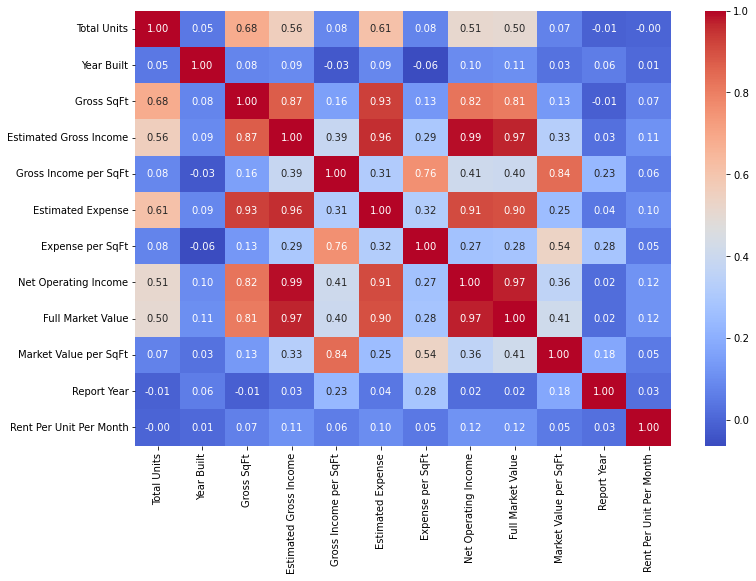

In [14]:
# Correlation matrix to understand the relationships
correlation_matrix = combined_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

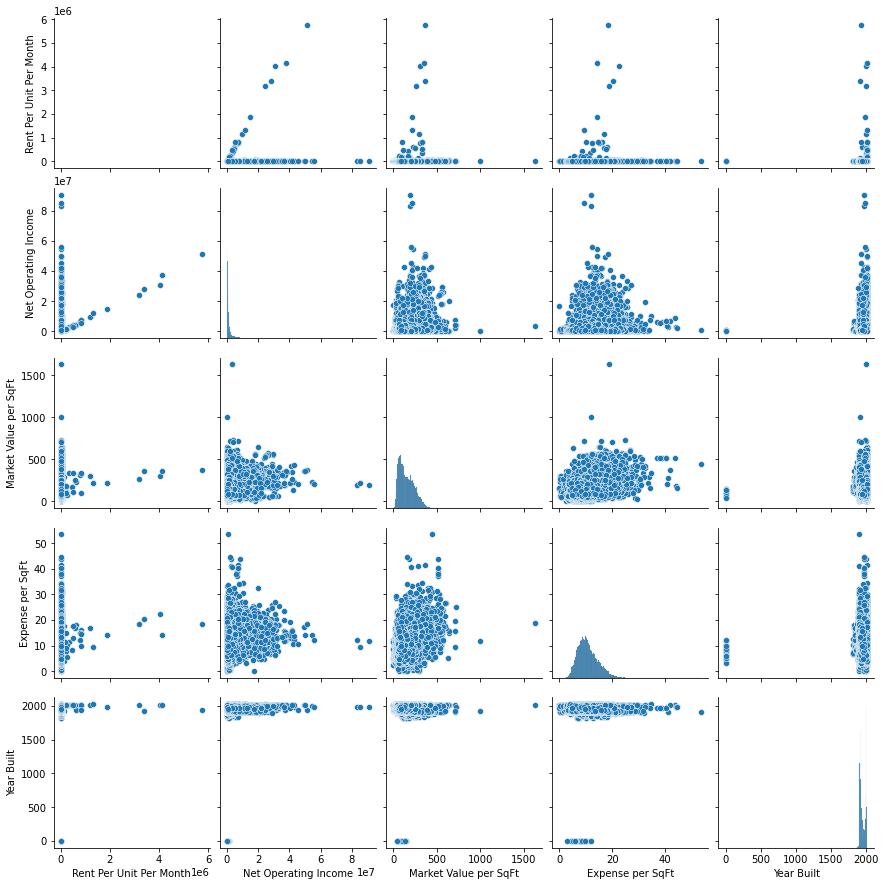

In [15]:
# Scatter plots or pair plots for key variables against Rent
sns.pairplot(combined_data, vars=['Rent Per Unit Per Month', 'Net Operating Income', 'Market Value per SqFt', 'Expense per SqFt', 'Year Built'])
plt.show()

## Data Preparation for Modeling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
# Handle categorical and numerical columns
categorical_columns = ['Building Classification']
 = ['Year Built', 'Net Operating Income', 'Market Value per SqFt', 'Expense per SqFt', 'Estimated Expense', 'Full Market Value', 'Gross SqFt']

In [18]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

In [19]:
# Prepare feature and target variables
X = combined_data[numerical_columns + categorical_columns]
y = combined_data['Rent Per Unit Per Month']

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## model building

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
# Create a modeling pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

In [23]:
# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2995186342.5725765


## Model Interpretation and Improvement

In [30]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=50, random_state=42)
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', dt_regressor)])
dt_pipeline.fit(X_train, y_train)

# Extracting feature importances
dt_features = dt_pipeline.named_steps['regressor'].feature_importances_
dt_feature_names = numerical_columns + list(preprocessor.transformers_[1][1].get_feature_names_out())
dt_top_features = sorted(zip(dt_feature_names, dt_features), key=lambda x: x[1], reverse=True)[:2]
print("Top 2 Decision Tree Features:", dt_top_features)

Top 2 Decision Tree Features: [('Gross SqFt', 0.5568515477069524), ('Full Market Value', 0.34042779630112086)]


In [31]:
#random forest
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_leaf=50, random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', rf_regressor)])
rf_pipeline.fit(X_train, y_train)

# Extracting feature importances
rf_features = rf_pipeline.named_steps['regressor'].feature_importances_
rf_top_features = sorted(zip(dt_feature_names, rf_features), key=lambda x: x[1], reverse=True)[:2]
print("Top 2 Random Forest Features:", rf_top_features)

Top 2 Random Forest Features: [('Estimated Expense', 0.3241364167516762), ('Full Market Value', 0.29824838742153814)]


In [37]:
#svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [40]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR())
])

### set up GridSearchCV to find the best combination of parameters for the SVR, focusing on the C, gamma, and kernel parameters

In [ ]:
param_grid = {
    'svr__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svr__gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'svr__kernel': ['rbf', 'linear', 'poly']  # Type of kernel
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [ ]:
# Evaluate the best grid search model
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Test MSE:", mse)